# Video Game Sales and Engagement Analysis

# Import Packages

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

pd.set_option("display.max_columns", None)

# Load Data

In [122]:
games = pd.read_csv(r"C:\Users\ritik\Desktop\Video_Game_Analysis\Data\games.csv")
sales = pd.read_csv(r"C:\Users\ritik\Desktop\Video_Game_Analysis\Data\vgsales.csv")

print("Games Data Loaded ✅")
print("Sales Data Loaded ✅")


Games Data Loaded ✅
Sales Data Loaded ✅


# Overview

In [123]:
print("Games Rows,Columns:", games.shape)
print("Sales Rows,Columns:", sales.shape)


Games Rows,Columns: (1512, 14)
Sales Rows,Columns: (16598, 11)


In [124]:
print("Missing values in games dataset:\n")
print(games.isnull().sum())

print("\nMissing values in sales dataset:\n")
print(sales.isnull().sum())


Missing values in games dataset:

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

Missing values in sales dataset:

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


# Impute Missing

In [125]:
# Fill missing Team and Summary with "Unknown"
games["Team"] = games["Team"].fillna("Unknown")
games["Summary"] = games["Summary"].fillna("Not Available")

# Fill missing Ratings with median
games["Rating"] = games["Rating"].fillna(games["Rating"].median())

# Fill missing Year with mode (most common year)
sales["Year"] = sales["Year"].fillna(sales["Year"].mode()[0])

# Fill missing Publisher with 'Unknown'
sales["Publisher"] = sales["Publisher"].fillna("Unknown")



# Checked null values

In [126]:
print(games.isnull().sum())
print(sales.isnull().sum())


Unnamed: 0           0
Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


# Detect Duplicate

In [127]:
games.drop_duplicates(inplace=True)
sales.drop_duplicates(inplace=True)

print("Duplicates removed ✅")


Duplicates removed ✅


# Convert K value

In [128]:
def convert_k(x):
    if isinstance(x,str) and "K" in x:
        return float(x.replace("K","")) * 1000
    return x

cols = ["Times Listed","Number of Reviews","Plays","Playing","Backlogs","Wishlist"]

for c in cols:
    games[c] = games[c].apply(convert_k)

print("K values converted ✅")


K values converted ✅


In [129]:
sales["Year"] = sales["Year"].fillna(0).astype(int)
print("Year column fixed ✅")


Year column fixed ✅


# Save clean dataset

In [130]:
games.to_csv("games_clean.csv", index=False)
print("games_clean.csv saved ✅")
sales.to_csv("sales_clean.csv", index=False)
print("sales_clean.csv saved ✅")


games_clean.csv saved ✅
sales_clean.csv saved ✅


In [131]:
def clean_lists(x):
    try:
        return ", ".join(ast.literal_eval(x)) if isinstance(x,str) and x.startswith("[") else x
    except:
        return x

games["Team"] = games["Team"].apply(clean_lists)
games["Genres"] = games["Genres"].apply(clean_lists)

print("Team & Genres cleaned ✅")


Team & Genres cleaned ✅


# Create column in both dataset

In [132]:
games["clean_title"] = games["Title"].str.lower().str.strip()
sales["clean_title"] = sales["Name"].str.lower().str.strip()


# Merge the both dataset

In [133]:
merged_df = pd.merge(games, sales, how="inner", on="clean_title")
print("Merged dataset shape:", merged_df.shape)


Merged dataset shape: (1384, 26)


In [134]:
merged_df.to_csv(r"C:\Users\ritik\Desktop\Video_Game_Analysis\Data\clean_merged_games.csv", index=False)
print("Final merged file saved ✅")


Final merged file saved ✅


In [135]:
merged_df.describe()


,Unnamed: 0,Rating,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000
mean,748.643786,3.654552,3775.433526,2007.947254,1.260773,0.758288,0.274783,0.246149,2.540022
std,445.798418,0.507522,4245.249176,6.623931,2.918453,1.799311,0.702145,0.628942,5.527478
min,5.000000,0.700000,1.000000,1981.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,371.000000,3.300000,564.750000,2005.000000,0.120000,0.070000,0.000000,0.020000,0.340000
50%,751.500000,3.700000,2024.000000,2010.000000,0.450000,0.300000,0.020000,0.080000,1.030000
75%,1141.000000,4.000000,5428.000000,2013.000000,1.240000,0.790000,0.190000,0.230000,2.672500
max,1511.000000,4.600000,16565.000000,2016.000000,41.490000,29.020000,6.810000,10.570000,82.740000


# Connect with MySQL and inserted the data

In [ ]:
import mysql.connector

# 1) CSV load
df = pd.read_csv(r"C:\Users\ritik\Desktop\Video_Game_Analysis\Data\clean_merged_games.csv")

# 2) MySQL connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",          # apna username
    password="ritik123", # apna password
    database="video_game_db"
)
cursor = conn.cursor()

# 3) Sirf relevant columns choose karo (table ke order ke hisaab se)
cols = [
    "Title", "Release Date", "Team", "Rating",
    "Times Listed", "Number of Reviews", "Genres", "Summary",
    "Reviews", "Plays", "Playing", "Backlogs", "Wishlist",
    "Rank", "Name", "Platform", "Year", "Genre", "Publisher",
    "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"
]
df = df[cols]

# 4) NULL handle (NaN -> None)
df = df.where(pd.notnull(df), None)

# 5) Insert query
insert_query = """
INSERT INTO clean_merged_games (
    title, release_date, team, rating,
    times_listed, number_of_reviews, genres, summary,
    reviews, plays, playing, backlogs, wishlist,
    rank_no, name, platform, year, genre, publisher,
    na_sales, eu_sales, jp_sales, other_sales, global_sales
) VALUES (
    %s, %s, %s, %s,
    %s, %s, %s, %s,
    %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s
)
"""

data = [tuple(row) for row in df.to_numpy()]

cursor.executemany(insert_query, data)
conn.commit()

print("Data inserted into MySQL ✅")

cursor.close()
conn.close()


In [42]:
# Columns order 
g_cols = [
    "Unnamed: 0", "Title", "Release Date", "Team", "Rating",
    "Times Listed", "Number of Reviews", "Genres", "Summary",
    "Reviews", "Plays", "Playing", "Backlogs", "Wishlist",
    "clean_title"
]
games = games[g_cols]

# NaN -> None
games = games.where(pd.notnull(games), None)

# MySQL connect
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="ritik123",
    database="video_game_db"
)
cur = conn.cursor()

# Insert query 
g_query = """
INSERT INTO games_clean (
    unnamed_0, title, release_date, team, rating,
    times_listed, number_of_reviews, genres, summary,
    reviews, plays, playing, backlogs, wishlist,
    clean_title
) VALUES (
    %s, %s, %s, %s,
    %s, %s, %s, %s,
    %s, %s, %s, %s,
    %s, %s, %s
)
"""

cur.executemany(g_query, [tuple(row) for row in games.to_numpy()])
conn.commit()
print("games_clean inserted ✅")

cur.close()
conn.close()


games_clean inserted ✅


In [44]:
# Columns order 
s_cols = [
    "Rank", "Name", "Platform", "Year",
    "Genre", "Publisher",
    "NA_Sales", "EU_Sales", "JP_Sales",
    "Other_Sales", "Global_Sales",
    "clean_title"
]
sales = sales[s_cols]

# NaN -> None
sales = sales.where(pd.notnull(sales), None)

# MySQL connect
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="ritik123",
    database="video_game_db"
)
cur = conn.cursor()

# Insert query 
s_query = """
INSERT INTO sales_clean (
    rank_no, name, platform, year, genre, publisher,
    na_sales, eu_sales, jp_sales, other_sales, global_sales,
    clean_title
) VALUES (
    %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s,
    %s
)
"""

cur.executemany(s_query, [tuple(row) for row in sales.to_numpy()])
conn.commit()
print("sales_clean inserted ✅")

cur.close()
conn.close()

sales_clean inserted ✅


# Exploratory Data Analysis (EDA) All 30 Queries

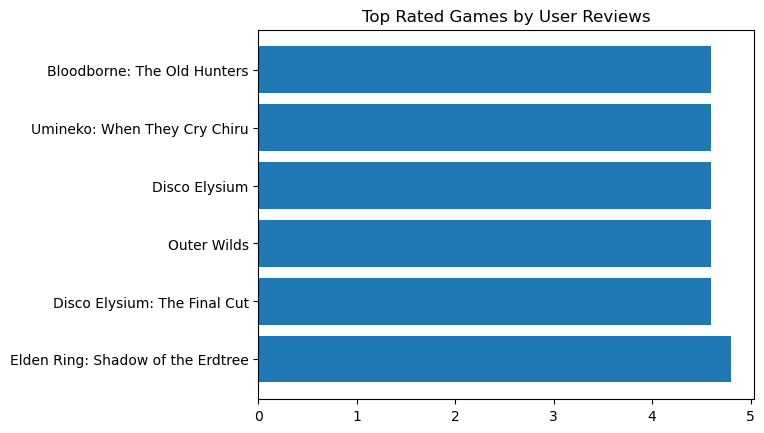

In [57]:
# Q1. What are the top-rated games by user reviews?

top = games.nlargest(10,"Rating")
plt.barh(top["Title"], top["Rating"])
plt.title("Top Rated Games by User Reviews")
plt.show()


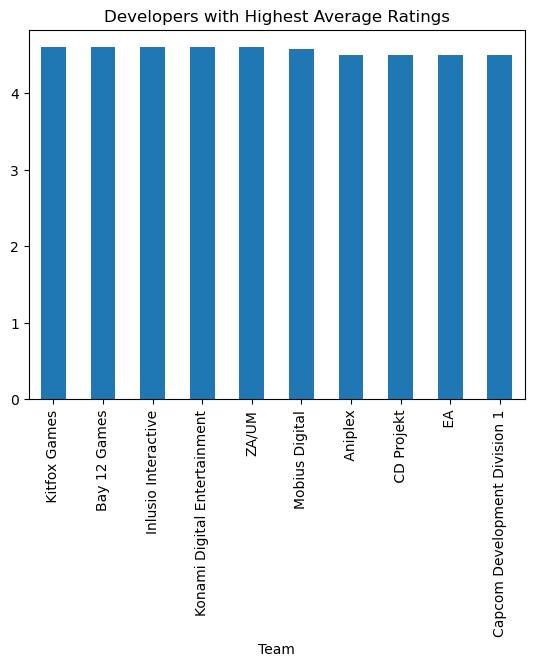

In [59]:
# Q2. Which developers (Teams) have the highest average ratings?

games.assign(Team=games.Team.str.split(",")).explode("Team") \
.groupby("Team")["Rating"].mean().nlargest(10) \
.plot.bar()
plt.title("Developers with Highest Average Ratings")
plt.show()

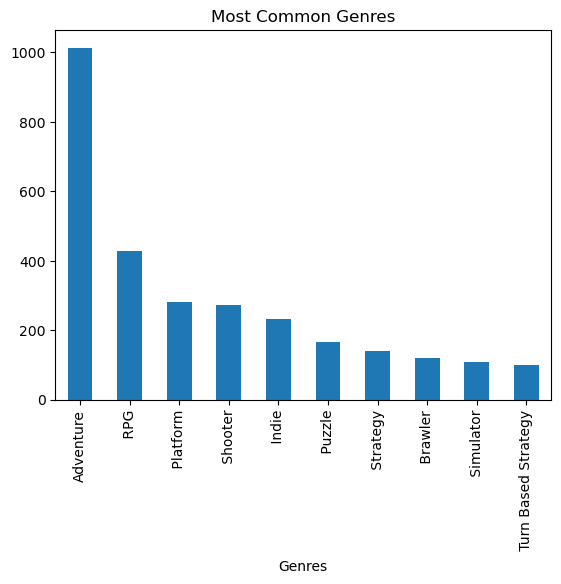

In [60]:
# Q3. What are the most common genres in the dataset?

games.Genres.str.split(",").explode().value_counts().head(10) \
.plot.bar()
plt.title("Most Common Genres")
plt.show()

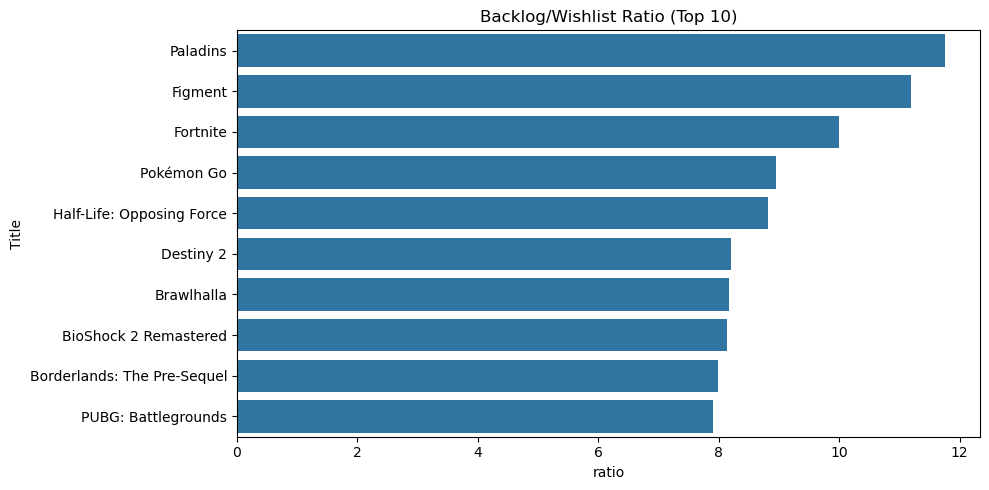

In [72]:
# Q4. Which games have the highest backlog compared to wishlist?

for c in ["Backlogs","Wishlist"]:
    games[c] = pd.to_numeric(games[c], errors="coerce")
q4 = games[(games["Wishlist"]>0) & games["Backlogs"].notna()].copy()
q4["ratio"] = q4["Backlogs"]/q4["Wishlist"]
q4 = q4.nlargest(10, "ratio")[["Title","ratio"]]
plt.figure(figsize=(10,5))
sns.barplot(data=q4, x="ratio", y="Title")
plt.title("Backlog/Wishlist Ratio (Top 10)"); plt.tight_layout(); plt.show()

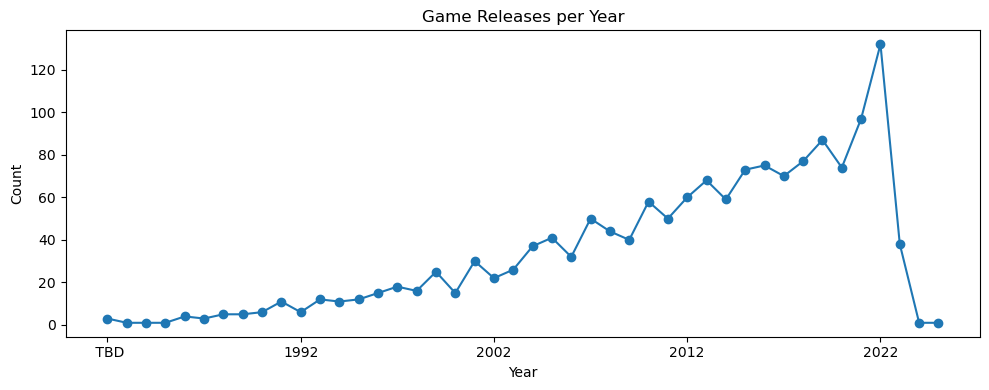

In [71]:
# Q5. What is the game release trend across years?

games["Release_Year"] = games["Release Date"].str[-4:].astype("int", errors="ignore")
q5 = games["Release_Year"].value_counts().sort_index()
q5.plot(kind="line", marker="o", figsize=(10,4))
plt.title("Game Releases per Year"); plt.xlabel("Year"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

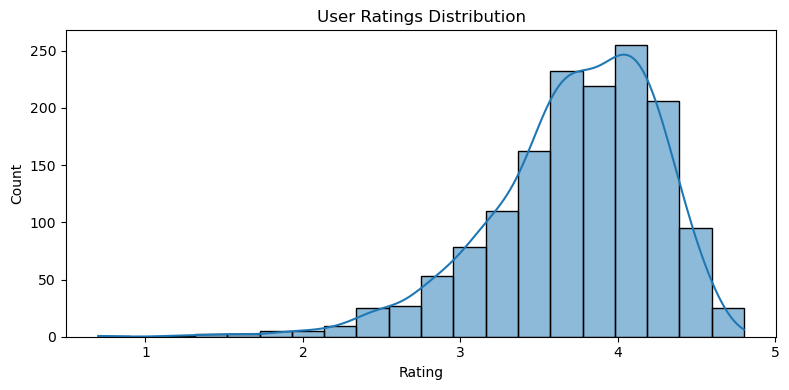

In [73]:
# Q6. What is the distribution of user ratings?

plt.figure(figsize=(8,4))
sns.histplot(games["Rating"], bins=20, kde=True)
plt.title("User Ratings Distribution"); plt.tight_layout(); plt.show()

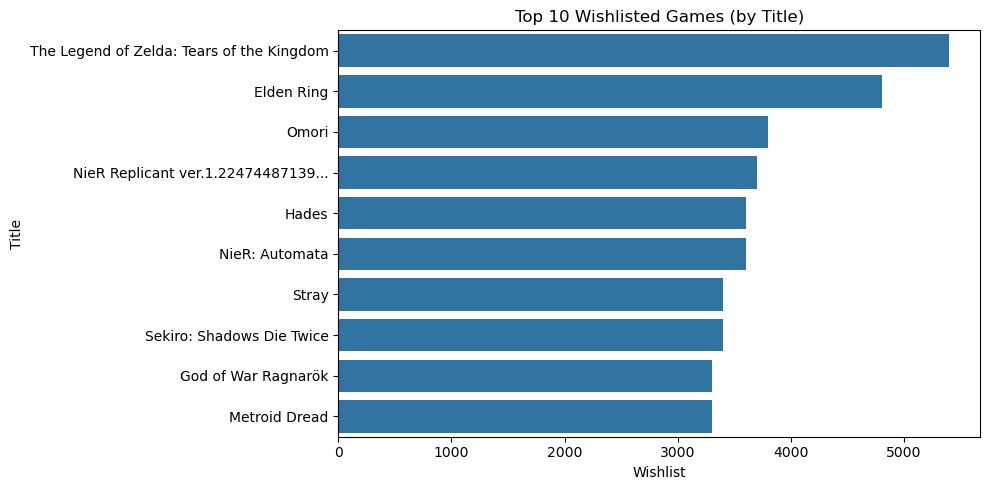

In [82]:
# Q7. What are the top 10 most wishlisted games?

q7 = (games.groupby("Title")["Wishlist"]
          .max()
          .sort_values(ascending=False)
          .head(10)
          .reset_index())

plt.figure(figsize=(10,5))
sns.barplot(data=q7, x="Wishlist", y="Title")
plt.title("Top 10 Wishlisted Games (by Title)")
plt.tight_layout()
plt.show()

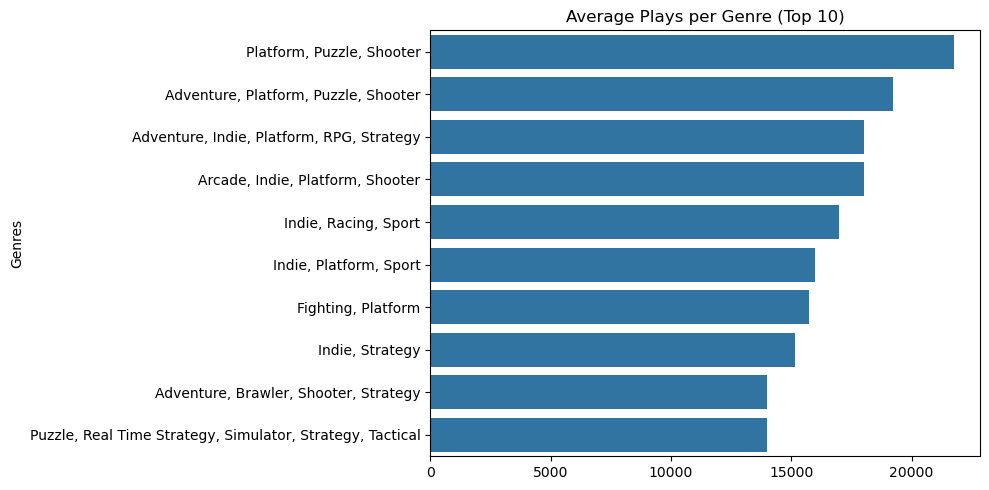

In [84]:
# Q8. What’s the average number of plays per genre?

q8 = (games.groupby("Genres")["Plays"].mean().sort_values(ascending=False).head(10))
plt.figure(figsize=(10,5))
sns.barplot(x=q8.values, y=q8.index)
plt.title("Average Plays per Genre (Top 10)"); plt.tight_layout(); plt.show()


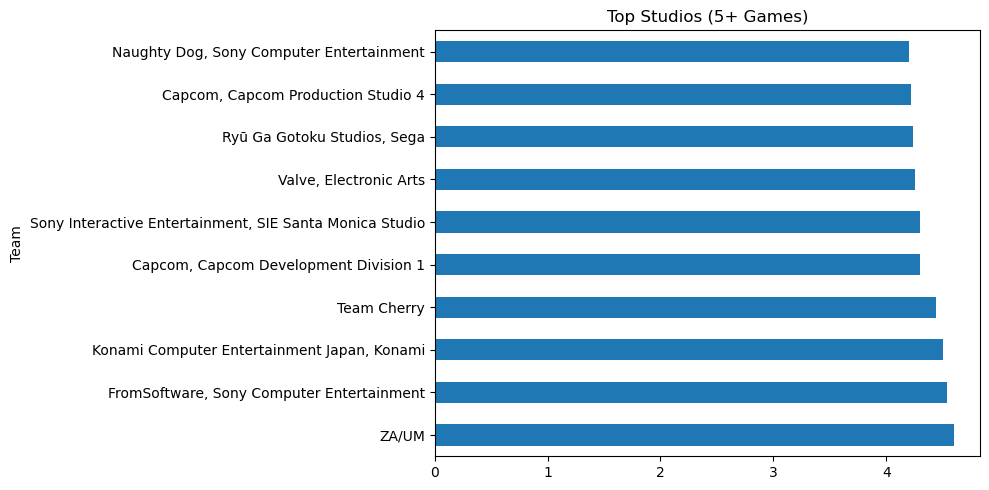

In [85]:
# Q9. Which developer studios are the most productive and impactful?

q9 = (games.groupby("Team").agg(game_count=("Title","count"), avg_rating=("Rating","mean"))
      .query("game_count>=5").sort_values(["avg_rating","game_count"], ascending=False).head(10))
q9.plot(kind="barh", y="avg_rating", figsize=(10,5), legend=False)
plt.title("Top Studios (5+ Games)"); plt.tight_layout(); plt.show()

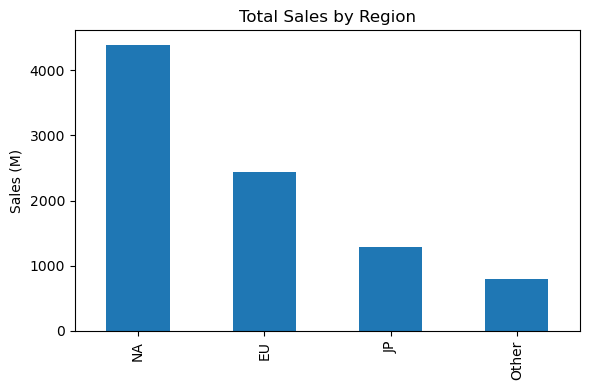

In [86]:
# Q10. Which region generates the most game sales?

q10 = pd.Series({"NA": sales["NA_Sales"].sum(), "EU": sales["EU_Sales"].sum(), "JP": sales["JP_Sales"].sum(), "Other": sales["Other_Sales"].sum()})
q10.plot(kind="bar", figsize=(6,4))
plt.title("Total Sales by Region"); plt.ylabel("Sales (M)"); plt.tight_layout(); plt.show()

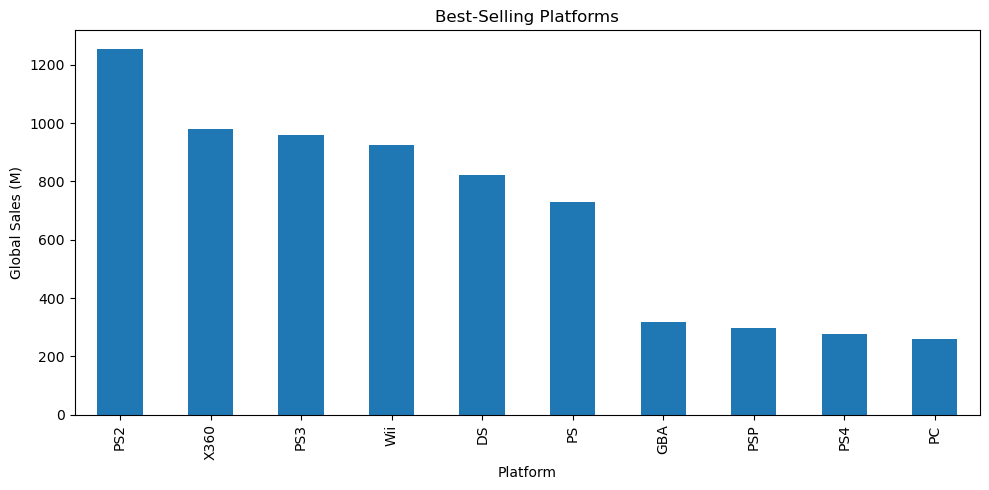

In [87]:
# Q11. What are the best-selling platforms?

q11 = (sales.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10))
q11.plot(kind="bar", figsize=(10,5))
plt.title("Best-Selling Platforms"); plt.ylabel("Global Sales (M)"); plt.tight_layout(); plt.show()

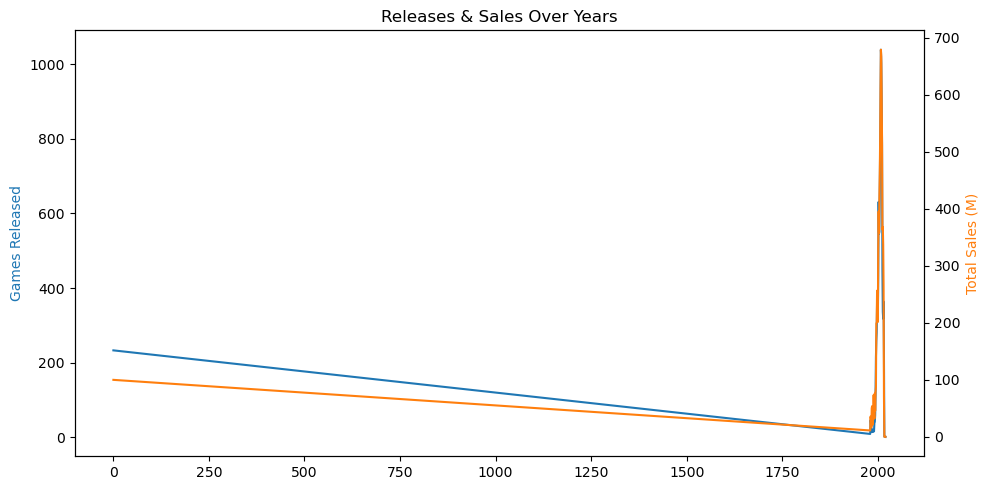

In [88]:
# Q12. What’s the trend of game releases and sales over years?

q12 = (sales.groupby("Year").agg(games_released=("Name","nunique"), total_sales=("Global_Sales","sum")).sort_index())
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(q12.index, q12["games_released"], color="tab:blue"); ax1.set_ylabel("Games Released", color="tab:blue")
ax2 = ax1.twinx()
ax2.plot(q12.index, q12["total_sales"], color="tab:orange"); ax2.set_ylabel("Total Sales (M)", color="tab:orange")
plt.title("Releases & Sales Over Years"); plt.tight_layout(); plt.show()

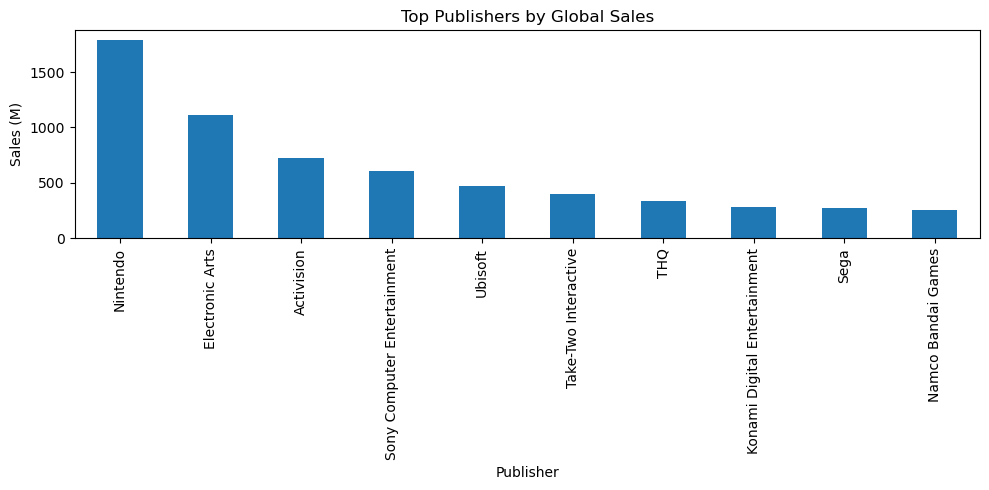

In [90]:
# Q13. Who are the top publishers by sales?

q13 = (sales.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10))
q13.plot(kind="bar", figsize=(10,5))
plt.title("Top Publishers by Global Sales"); plt.ylabel("Sales (M)"); plt.tight_layout(); plt.show()

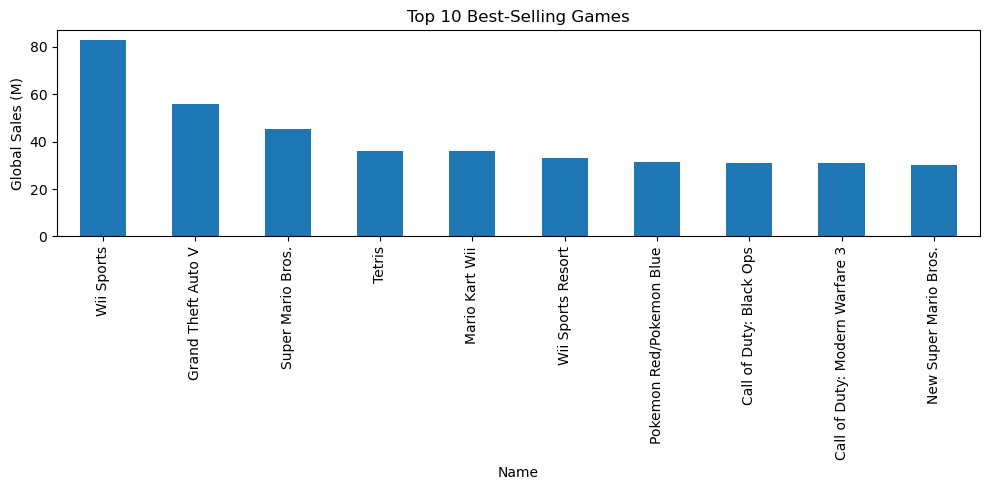

In [91]:
# Q14. Which games are the top 10 best-sellers globally?

q14 = (sales.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False).head(10))
q14.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Best-Selling Games"); plt.ylabel("Global Sales (M)"); plt.tight_layout(); plt.show()

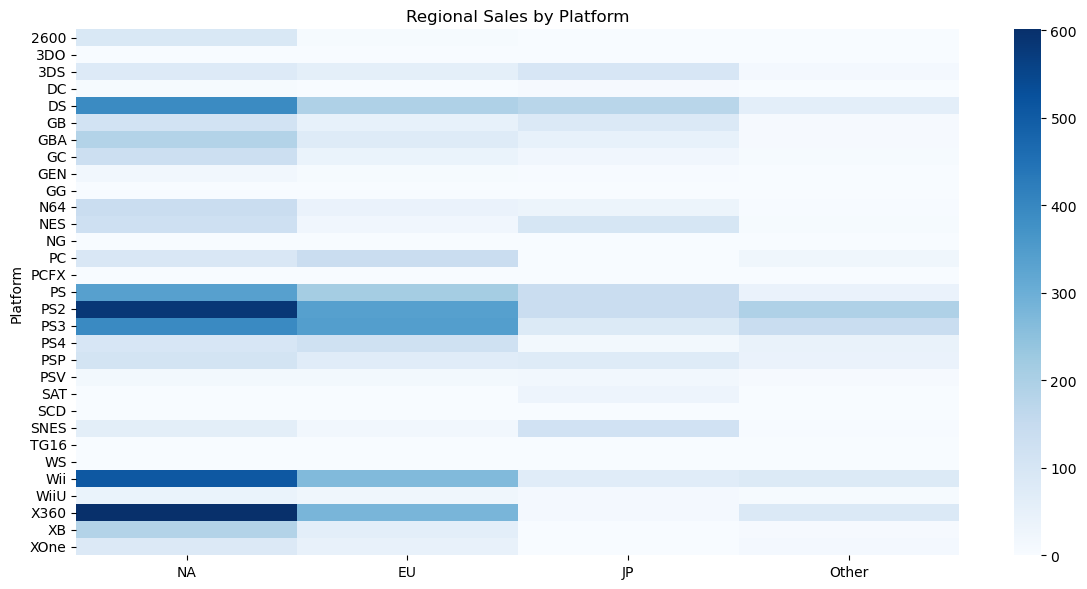

In [92]:
# Q15. How do regional sales compare for specific platforms?

q15 = (sales.groupby("Platform").agg(NA=("NA_Sales","sum"), EU=("EU_Sales","sum"), JP=("JP_Sales","sum"), Other=("Other_Sales","sum")))
plt.figure(figsize=(12,6))
sns.heatmap(q15, cmap="Blues")
plt.title("Regional Sales by Platform"); plt.tight_layout(); plt.show()

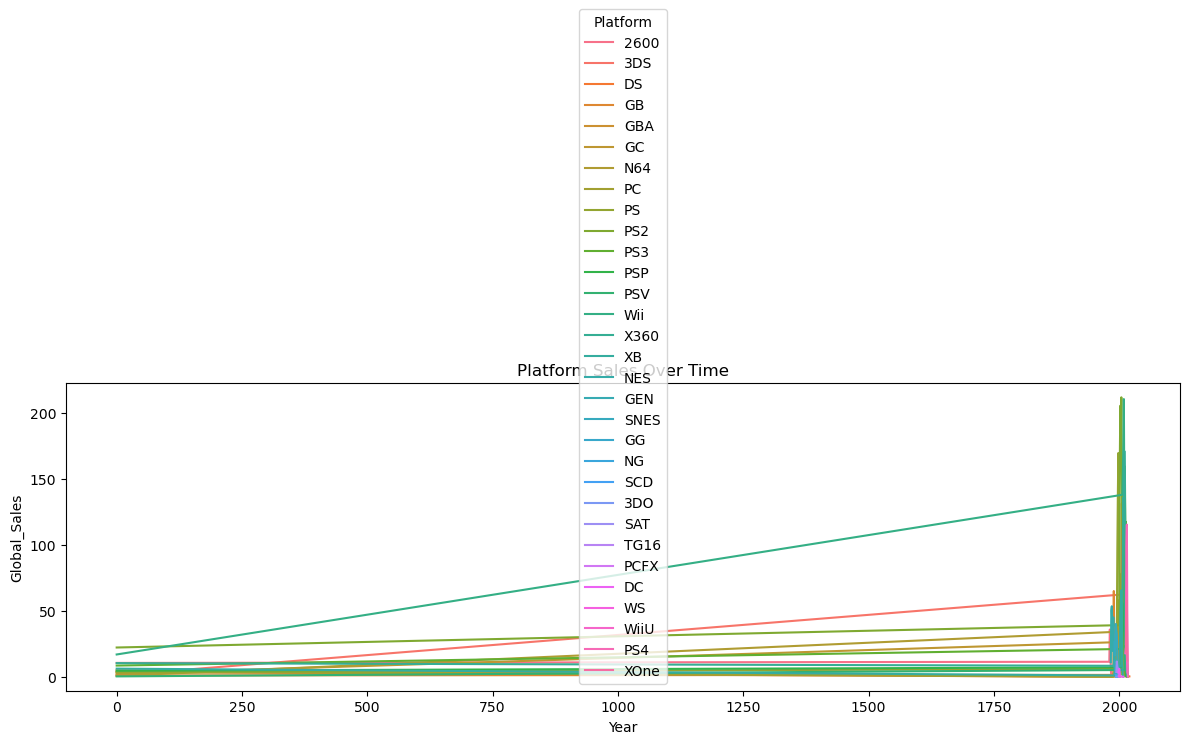

In [93]:
# Q16. How has the market evolved by platform over time?

q16 = (sales.groupby(["Year","Platform"])["Global_Sales"].sum().reset_index())
plt.figure(figsize=(12,6))
sns.lineplot(data=q16, x="Year", y="Global_Sales", hue="Platform")
plt.title("Platform Sales Over Time"); plt.tight_layout(); plt.show()

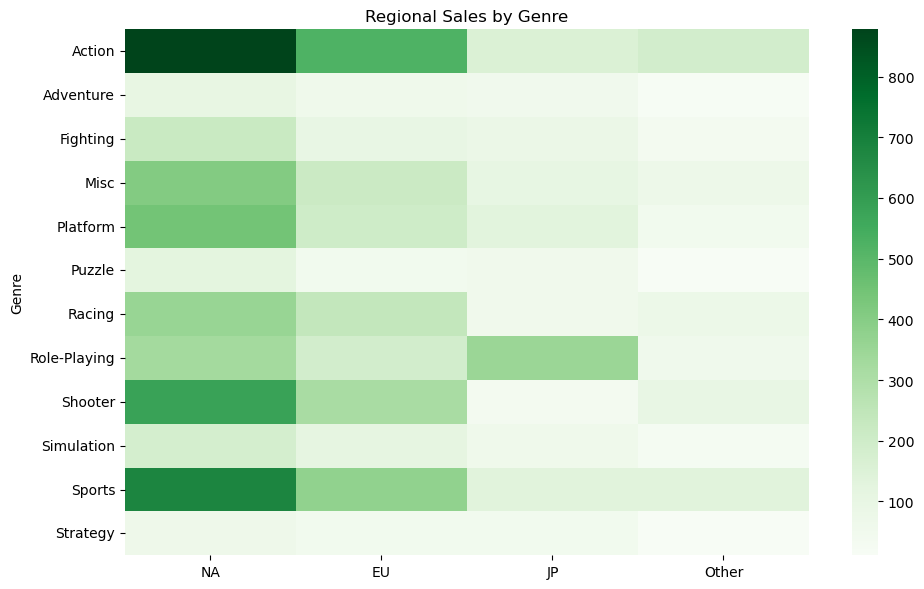

In [94]:
# Q17. What are the regional genre preferences?

q17 = (sales.groupby("Genre").agg(NA=("NA_Sales","sum"), EU=("EU_Sales","sum"), JP=("JP_Sales","sum"), Other=("Other_Sales","sum")))
plt.figure(figsize=(10,6))
sns.heatmap(q17, cmap="Greens")
plt.title("Regional Sales by Genre"); plt.tight_layout(); plt.show()

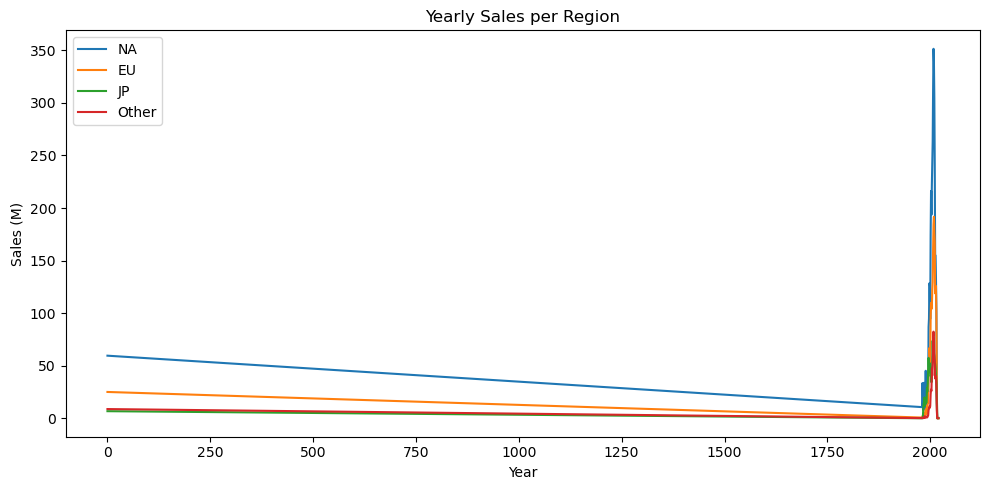

In [95]:
# Q18. What’s the yearly sales change per region?

q18 = (sales.groupby("Year").agg(NA=("NA_Sales","sum"), EU=("EU_Sales","sum"), JP=("JP_Sales","sum"), Other=("Other_Sales","sum")).sort_index())
q18.plot(figsize=(10,5))
plt.title("Yearly Sales per Region"); plt.ylabel("Sales (M)"); plt.tight_layout(); plt.show()

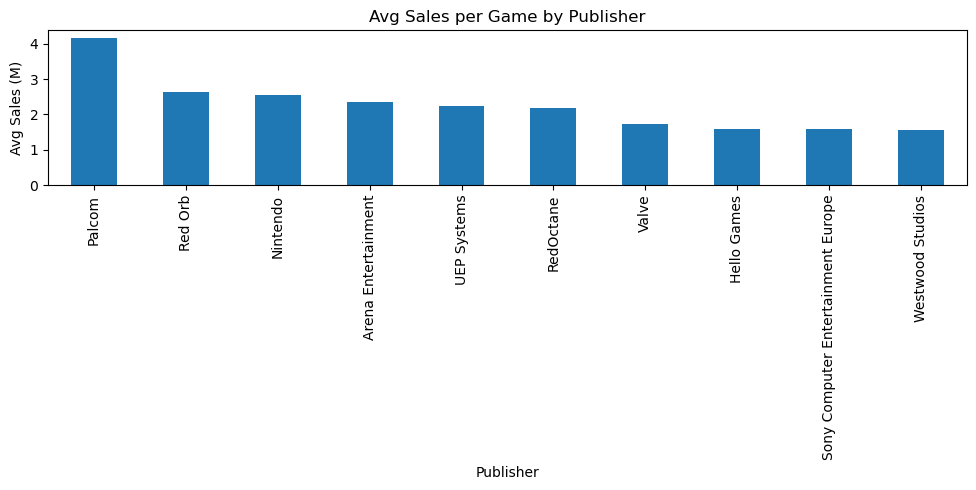

In [96]:
# Q19. What is the average sales per publisher?

q19 = (sales.groupby("Publisher")["Global_Sales"].mean().sort_values(ascending=False).head(10))
q19.plot(kind="bar", figsize=(10,5))
plt.title("Avg Sales per Game by Publisher"); plt.ylabel("Avg Sales (M)"); plt.tight_layout(); plt.show()

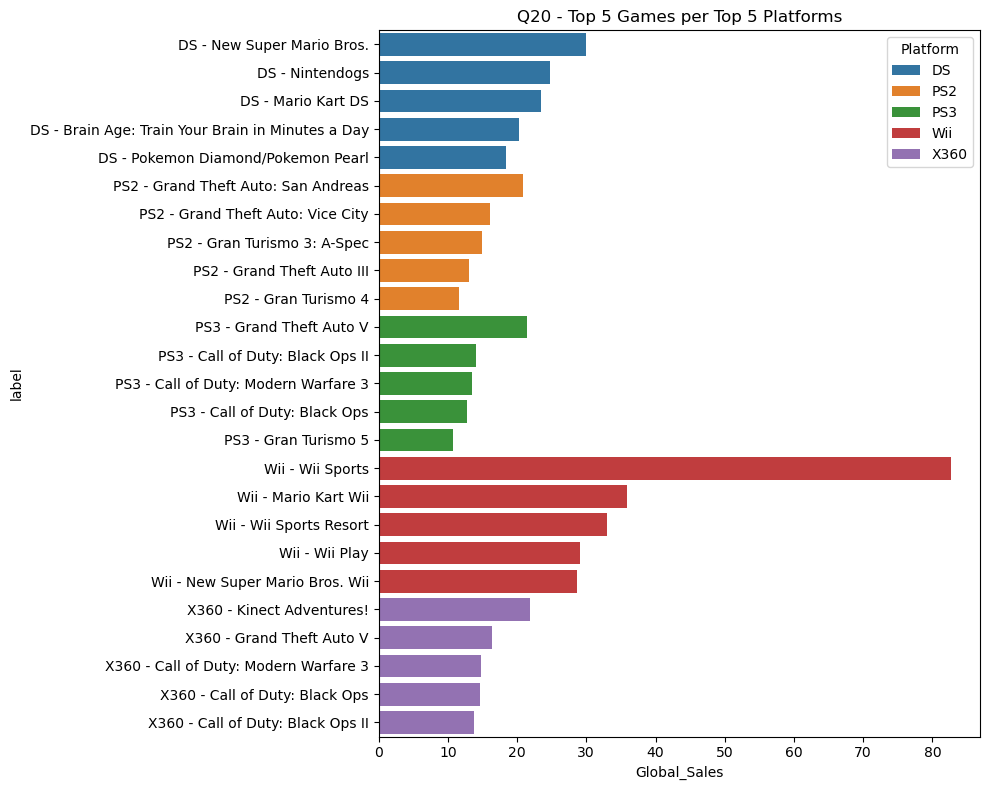

In [107]:
# Q20. What are the top 5 best-selling games per platform?

top_plat = (sales.groupby("Platform")["Global_Sales"]
            .sum().nlargest(5).index)

q20 = (sales[sales["Platform"].isin(top_plat)]
       .groupby(["Platform","Name"])["Global_Sales"]
       .sum().reset_index())

q20["rank"] = q20.groupby("Platform")["Global_Sales"].rank("first", ascending=False)
q20 = q20[q20["rank"] <= 5].sort_values(["Platform","rank"])
q20["label"] = q20["Platform"] + " - " + q20["Name"]

plt.figure(figsize=(10,8))
sns.barplot(data=q20, x="Global_Sales", y="label", hue="Platform", dodge=False)
plt.title("Q20 - Top 5 Games per Top 5 Platforms")
plt.tight_layout()
plt.show()

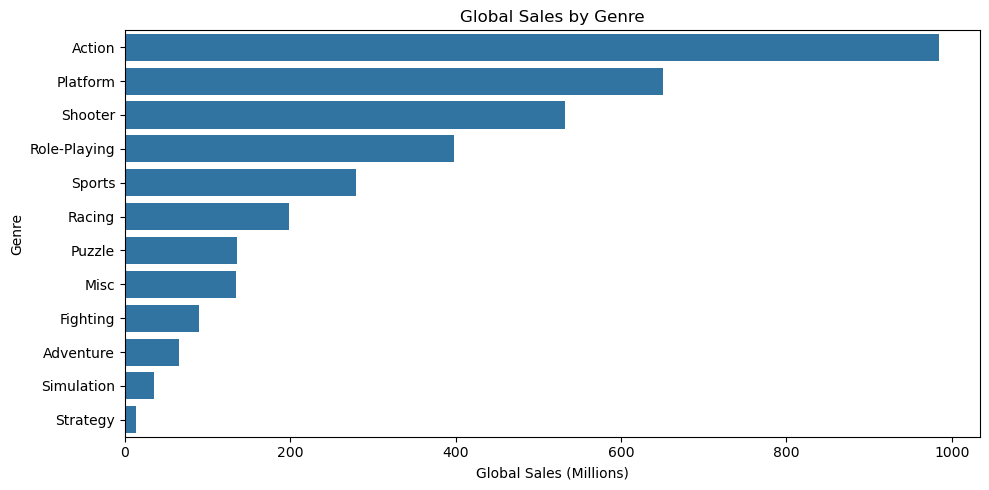

In [111]:
# Q21 - Which game genres generate the most global sales?
merged = pd.read_csv(
    r"C:\Users\ritik\Desktop\Video_Game_Analysis\Data\clean_merged_games.csv"
)
q21 = (merged.groupby("Genre")["Global_Sales"]
       .sum().sort_values(ascending=False))
plt.figure(figsize=(10,5))
sns.barplot(x=q21.values, y=q21.index)
plt.title("Global Sales by Genre")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

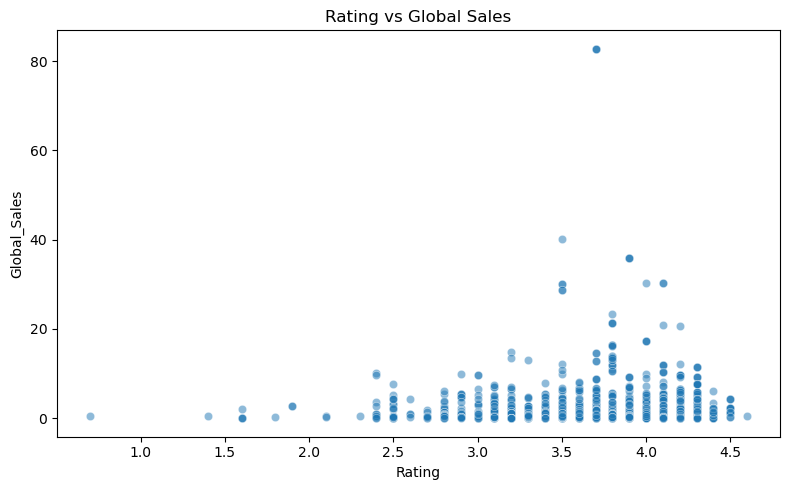

In [112]:
# Q22. How does user rating affect global sales?

plt.figure(figsize=(8,5))
sns.scatterplot(data=merged, x="Rating", y="Global_Sales", alpha=0.5)
plt.title("Rating vs Global Sales"); plt.tight_layout(); plt.show()

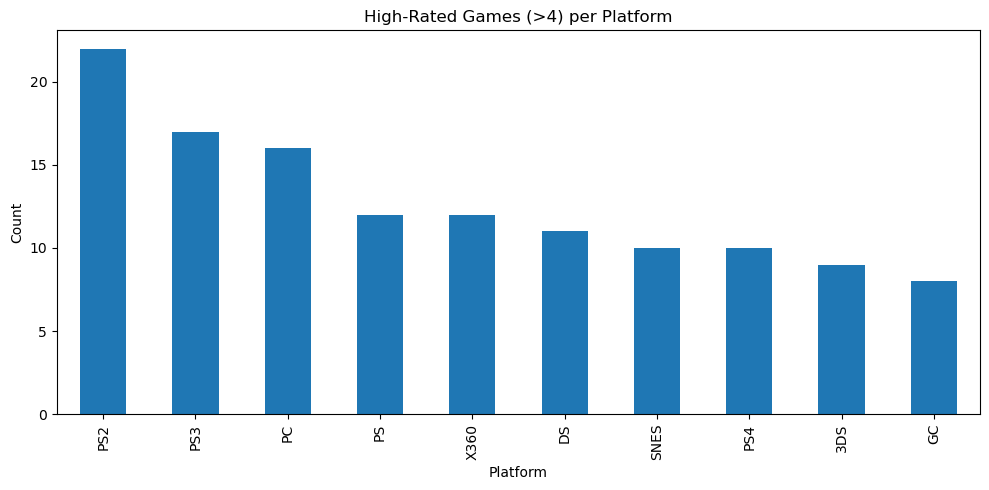

In [113]:
# Q23. Which platforms have the most games with high ratings (e.g., above 4)?

q23 = (merged[merged["Rating"]>4].groupby("Platform")["Title"].nunique().sort_values(ascending=False).head(10))
q23.plot(kind="bar", figsize=(10,5))
plt.title("High-Rated Games (>4) per Platform"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

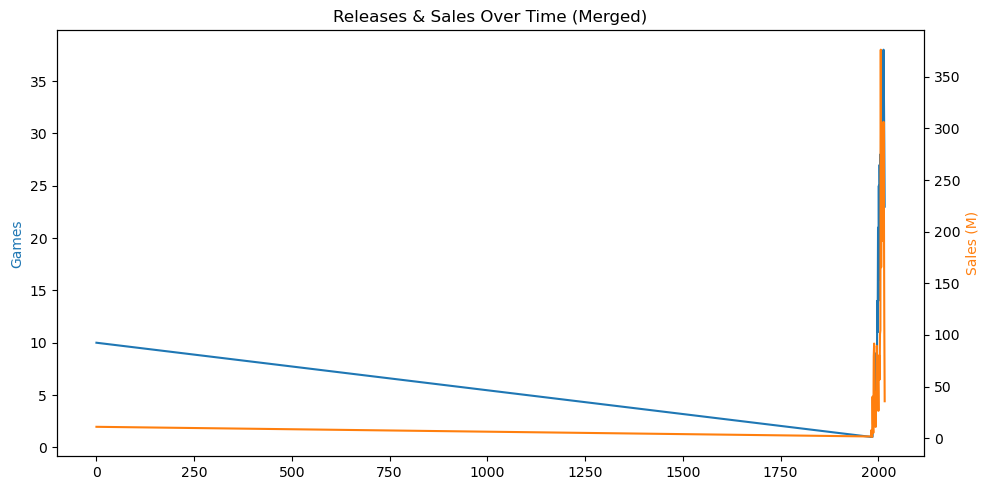

In [114]:
# Q24. What’s the trend of releases and sales over time?

q24 = (merged.groupby("Year").agg(games_released=("Title","nunique"), total_sales=("Global_Sales","sum")).sort_index())
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(q24.index, q24["games_released"], color="tab:blue"); ax1.set_ylabel("Games", color="tab:blue")
ax2 = ax1.twinx()
ax2.plot(q24.index, q24["total_sales"], color="tab:orange"); ax2.set_ylabel("Sales (M)", color="tab:orange")
plt.title("Releases & Sales Over Time (Merged)"); plt.tight_layout(); plt.show()

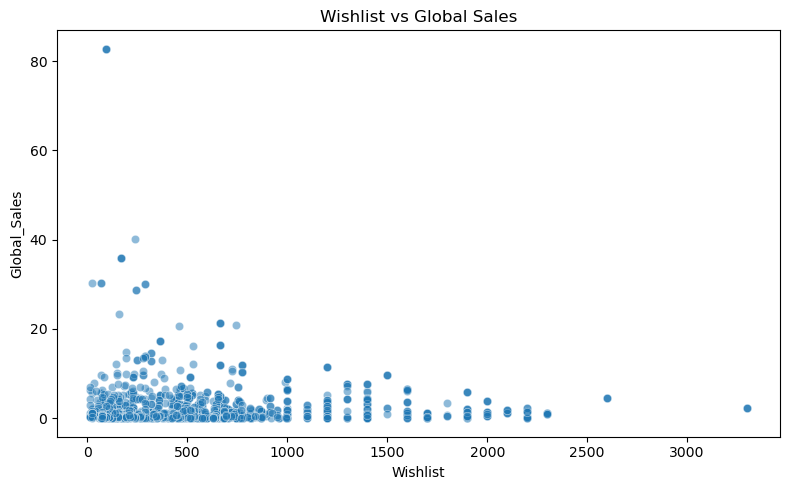

In [115]:
# Q25. Do highly wishlisted games lead to more sales?

plt.figure(figsize=(8,5))
sns.scatterplot(data=merged, x="Wishlist", y="Global_Sales", alpha=0.5)
plt.title("Wishlist vs Global Sales"); plt.tight_layout(); plt.show()

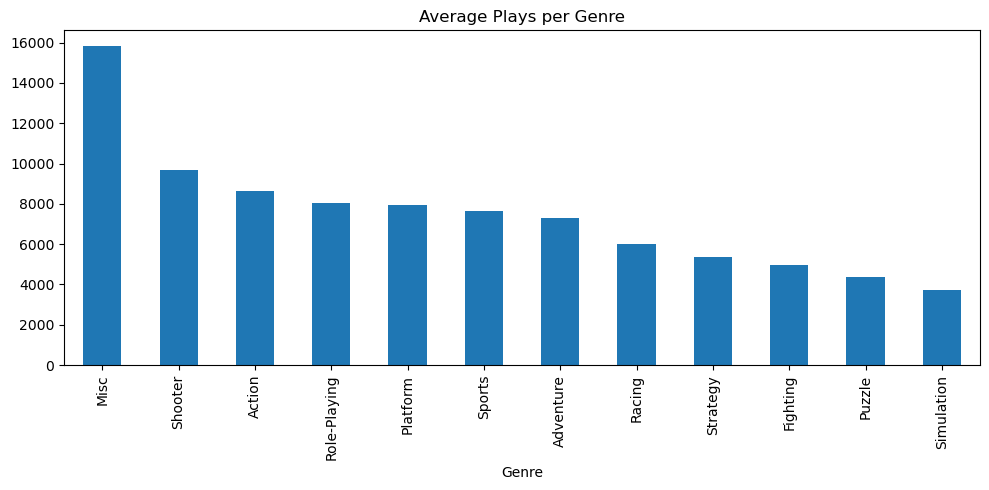

In [116]:
# Q26. Which genres have the highest engagement but lowest sales?

q26 = (merged.groupby("Genre").agg(avg_plays=("Plays","mean"), avg_sales=("Global_Sales","mean"))
       .sort_values("avg_plays", ascending=False))
q26.head(15).plot(kind="bar", y="avg_plays", figsize=(10,5), legend=False)
plt.title("Average Plays per Genre"); plt.tight_layout(); plt.show()

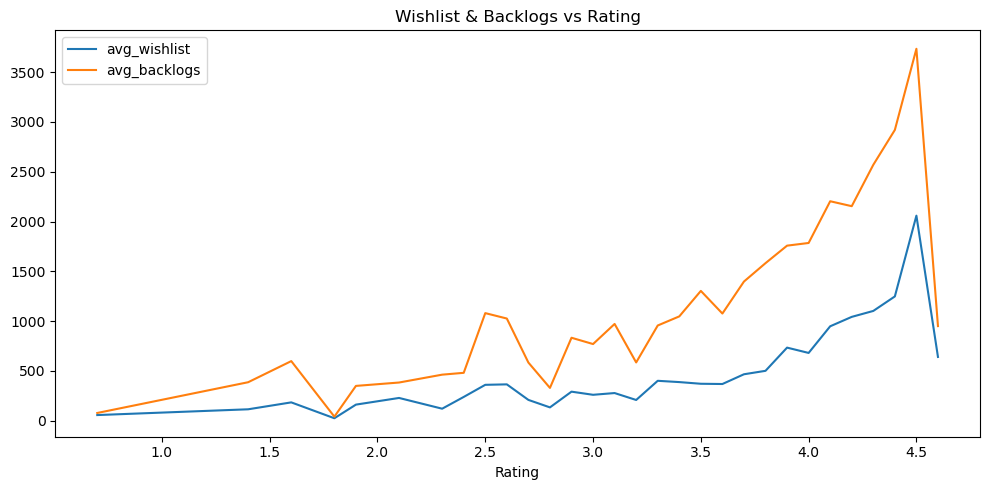

In [117]:
# Q27. Do highly listed games (wishlist/backlogs) correlate with better ratings?

q27 = (merged.groupby("Rating").agg(avg_wishlist=("Wishlist","mean"), avg_backlogs=("Backlogs","mean")).sort_index())
q27.plot(figsize=(10,5))
plt.title("Wishlist & Backlogs vs Rating"); plt.tight_layout(); plt.show()

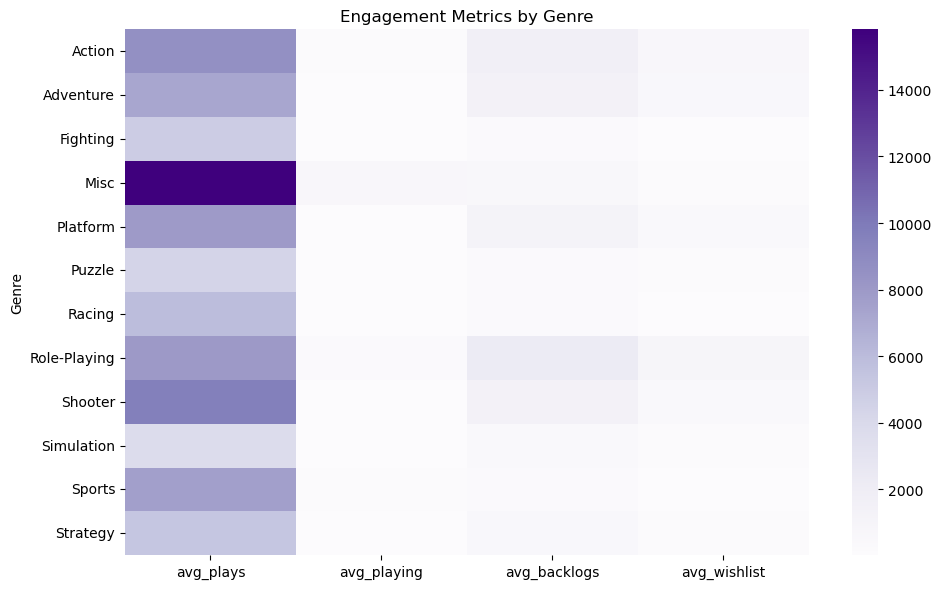

In [118]:
# Q28. How does user engagement differ across genres?

q28 = (merged.groupby("Genre").agg(avg_plays=("Plays","mean"), avg_playing=("Playing","mean"), 
                                  avg_backlogs=("Backlogs","mean"), avg_wishlist=("Wishlist","mean")))
plt.figure(figsize=(10,6))
sns.heatmap(q28, cmap="Purples")
plt.title("Engagement Metrics by Genre"); plt.tight_layout(); plt.show()

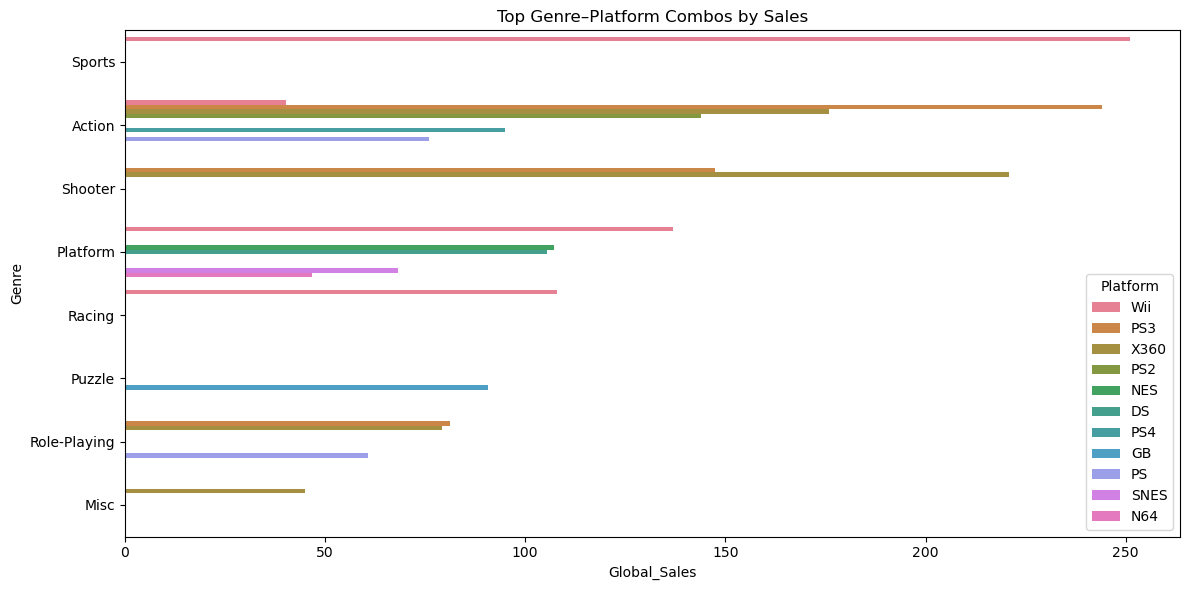

In [119]:
# Q29. What are the top-performing combinations of Genre + Platform?

q29 = (merged.groupby(["Genre","Platform"])["Global_Sales"].sum().reset_index()
       .sort_values("Global_Sales", ascending=False).head(20))
plt.figure(figsize=(12,6))
sns.barplot(data=q29, x="Global_Sales", y="Genre", hue="Platform")
plt.title("Top Genre–Platform Combos by Sales"); plt.tight_layout(); plt.show()

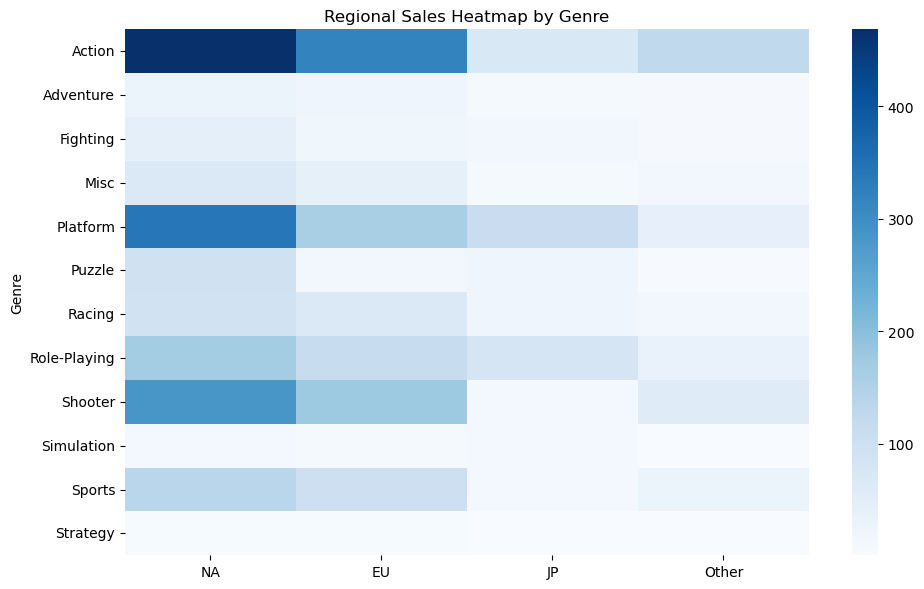

In [120]:
# Q30. What does a regional sales heatmap by genre reveal?

q30 = (merged.groupby("Genre").agg(NA=("NA_Sales","sum"), EU=("EU_Sales","sum"), 
                                  JP=("JP_Sales","sum"), Other=("Other_Sales","sum")))
plt.figure(figsize=(10,6))
sns.heatmap(q30, cmap="Blues")
plt.title("Regional Sales Heatmap by Genre"); plt.tight_layout(); plt.show()

# Ratings and engagement (games.csv)
The analyses on the games dataset highlight which titles and developer teams achieve the highest user ratings, which genres are most common, and where players spend most of their time (plays, wishlists, and backlogs).​
Release‑trend and rating‑distribution charts show how the volume and quality of releases have evolved over time, while backlog‑to‑wishlist ratios reveal games that are highly desired but not yet widely played.

# Sales and market structure (vgsales.csv)
The sales charts show which regions and platforms drive the largest share of global sales and how the market has shifted across hardware generations over the years.​
Publisher and top‑seller analyses identify the most commercially successful companies and flagship titles, and regional genre breakdowns reveal how player tastes differ between North America, Europe, Japan, and other markets.

# Combined view (merged dataset)
Using the merged dataset, the project links ratings, engagement metrics, and sales to explore how strongly quality and player interest translate into revenue.​
These visuals uncover high‑engagement but under‑monetized genres, platforms with the richest library of highly rated games, and the most powerful genre–platform combinations and regional niches, providing clear strategic insights for future game launches.